In [ ]:
!wget https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-images-small.tar

--2024-06-20 12:31:40--  https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-images-small.tar
Resolving amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)... 16.182.71.241, 52.217.130.217, 52.217.83.68, ...
Connecting to amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)|16.182.71.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3253381120 (3.0G) [application/x-tar]
Saving to: ‘abo-images-small.tar’

abo-images-small.ta 100%[===================>]   3.03G  16.0MB/s    in 3m 24s  

2024-06-20 12:35:04 (15.2 MB/s) - ‘abo-images-small.tar’ saved [3253381120/3253381120]



In [ ]:
!tar -xvf "/content/abo-images-small.tar" -C "/content/"


Streaming output truncated to the last 5000 lines.
images/small/de/ded35ad1.jpg
images/small/de/dee9d079.jpg
images/small/de/de62ecb0.jpg
images/small/de/de4a0f39.jpg
images/small/de/de8ad9f0.jpg
images/small/de/de9b10c1.jpg
images/small/de/dedb1ac7.jpg
images/small/de/de0e7390.jpg
images/small/de/de9ed799.jpg
images/small/de/dee5cd4c.jpg
images/small/de/defcf923.jpg
images/small/de/de139f62.jpg
images/small/de/de29aca6.jpg
images/small/de/de3a69f9.jpg
images/small/de/debd544b.jpg
images/small/de/def1c6fa.jpg
images/small/de/de9f78b3.jpg
images/small/de/dea862ca.jpg
images/small/de/de2c8a98.jpg
images/small/de/de02b860.jpg
images/small/de/de3df885.jpg
images/small/de/de716a2a.jpg
images/small/de/de83f5ce.jpg
images/small/de/de45d158.jpg
images/small/de/de06ecb3.jpg
images/small/de/def81caf.jpg
images/small/de/de40d9a3.jpg
images/small/de/de066f92.jpg
images/small/de/de6b5b17.jpg
images/small/de/de01c750.jpg
images/small/de/de6079d1.jpg
images/small/de/de388fd2.jpg
images/small/de/deec7

In [ ]:
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/imageid_map.json /content/

In [ ]:
!cp /content/drive/MyDrive/product_type_map.json /content/

In [ ]:
!cp /content/drive/MyDrive/panchayat_screenshots.zip /content/

In [ ]:
!unzip panchayat_screenshots

Archive:  panchayat_screenshots.zip
  inflating: screenshots/screenshot_0.png  
  inflating: screenshots/screenshot_1.png  
  inflating: screenshots/screenshot_10.png  
  inflating: screenshots/screenshot_100.png  
  inflating: screenshots/screenshot_1000.png  
  inflating: screenshots/screenshot_1001.png  
  inflating: screenshots/screenshot_1002.png  
  inflating: screenshots/screenshot_101.png  
  inflating: screenshots/screenshot_1010.png  
  inflating: screenshots/screenshot_1011.png  
  inflating: screenshots/screenshot_1012.png  
  inflating: screenshots/screenshot_102.png  
  inflating: screenshots/screenshot_1020.png  
  inflating: screenshots/screenshot_1021.png  
  inflating: screenshots/screenshot_1022.png  
  inflating: screenshots/screenshot_1030.png  
  inflating: screenshots/screenshot_1031.png  
  inflating: screenshots/screenshot_1032.png  
  inflating: screenshots/screenshot_1040.png  
  inflating: screenshots/screenshot_1041.png  
  inflating: screenshots/screenshot

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image, ImageEnhance
import random
import yaml
from rembg import remove
import io
import matplotlib.pyplot as plt
import json
import math
import pandas as pd
import gc

In [ ]:

# Directories
object_dir = '/content/images/small'
background_dir = '/content/screenshots'
output_image_dir = 'data/images'
output_label_dir = 'data/labels'

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)
os.makedirs(f"{output_label_dir}/train", exist_ok=True)
os.makedirs(f"{output_label_dir}/val", exist_ok=True)
os.makedirs(f"{output_image_dir}/train", exist_ok=True)
os.makedirs(f"{output_image_dir}/val", exist_ok=True)


image_shape=(320,180)



In [ ]:
link_mapping=json.load(open("product_type_map.json"))
type_of_products=link_mapping.keys()
classes=range(len(type_of_products))
class_to_product=dict(zip(classes,type_of_products))
product_to_class=dict(zip(type_of_products,classes))




In [ ]:
imageid_map=json.load(open("imageid_map.json"))
id_to_class=dict()
id_to_product=dict()
for key,value in imageid_map.items():
  id_to_product[key]=value["product_type"]
  id_to_class[key]=product_to_class[value["product_type"]]

In [ ]:
images_df = pd.read_csv('/content/images/metadata/images.csv.gz', compression='gzip')
images_df.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [ ]:
images_df.shape

(398212, 4)

In [ ]:

# Function to load and remove background from objects
def load_and_remove_bg(object_path):
    img = Image.open(object_path)
    # img = remove(img)
    return img

# Function to augment objects
def augment_object(obj_img):
    # Random rotation
    angle = random.randint(0, 360)
    obj_img = obj_img.rotate(angle, expand=True)

    # Random flip
    if random.random() > 0.5:
        obj_img = obj_img.transpose(Image.FLIP_LEFT_RIGHT)
    if random.random() > 0.5:
        obj_img = obj_img.transpose(Image.FLIP_TOP_BOTTOM)

    # Random brightness
    enhancer = ImageEnhance.Brightness(obj_img)
    obj_img = enhancer.enhance(random.uniform(0.5, 1.5))

    return obj_img

# Function to create augmented copies of objects
def create_augmented_objects(objects, num_copies=5):
    augmented_objects = []
    labels=[]
    for obj_img in objects:
        try:
          augmented_objects.append(obj_img[1])
          labels.append(id_to_class[obj_img[0]])
          # print(obj_img[0],id_to_class[obj_img[0]])
          for _ in range(num_copies-1):
              augmented_objects.append(augment_object(obj_img[1]))
              labels.append(id_to_class[obj_img[0]])
        except:
          pass

    return augmented_objects,labels

# Function to place objects on background
def place_objects_on_background(background, objects, labels,split=0.3,num_objects=10):
    bg_img = Image.open(background).convert("RGBA").resize(image_shape)
    bg_w, bg_h = bg_img.size
    bboxes = []
    xt,yt=0,0
    for _ in range(num_objects):
        obj_img = objects[_].convert("RGBA")
        obj_w, obj_h = obj_img.size

        scale_factor = random.uniform(0.1, 0.3)
        obj_img = obj_img.resize((math.ceil(obj_w * scale_factor), math.ceil(obj_h * scale_factor)))
        obj_w, obj_h = obj_img.size

        max_x = bg_w - obj_w
        max_y = bg_h - obj_h
        x = random.randint(xt, max_x)
        y = random.randint(yt, max_y)


        bg_img.paste(obj_img, (x, y), obj_img)

        x_center = (x + obj_w / 2) / bg_w
        y_center = (y + obj_h / 2) / bg_h
        width = obj_w / bg_w
        height = obj_h / bg_h

        bboxes.append([labels[_], x_center, y_center, width, height])

    return bg_img, bboxes


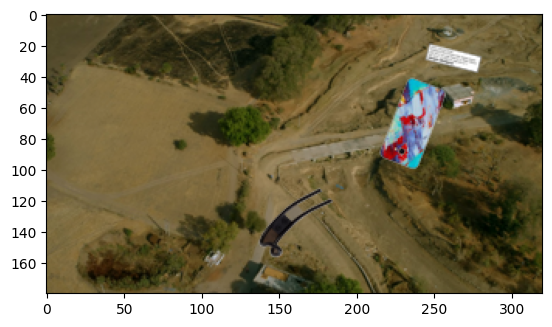

In [ ]:
objects=[]
for img in os.listdir("images/small/0a")[:5]:
    objects.append(augment_object(load_and_remove_bg(os.path.join("images/small/0a",img))))
opt=place_objects_on_background("screenshots/screenshot_10.png",objects,range(len(objects)),num_objects=3)[0]
plt.imshow(opt)
# print(np.array(opt).shape)

In [ ]:
original_objects = []
for i in range(len(images_df)):
  original_objects.append([images_df['image_id'][i],load_and_remove_bg(os.path.join(object_dir,images_df['path'][i]))])



In [ ]:
augmented_objects,labels = create_augmented_objects(original_objects, num_copies=5)


In [ ]:
import time
start_time = time.time()
augment_object(load_and_remove_bg(os.path.join(object_dir,images_df['path'][0])))
end_time = time.time()
print("Time taken:", end_time - start_time)

Time taken: 0.0115814208984375


In [ ]:
class_to_product[labels[1]]

'KITCHEN'

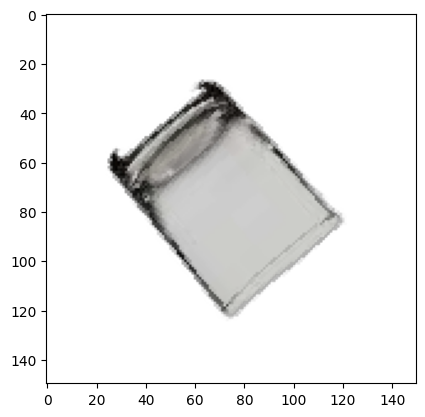

In [ ]:
plt.imshow(augmented_objects[1])

In [ ]:
rand=random.random()
mode="train"
if(rand<=0.5):
  mode="val"
output_image_path = os.path.join(output_image_dir,mode, f"{10}.jpg")
print(output_image_path)
print(mode)

data/images/val/10.jpg
val


In [ ]:



# Process all background images
image_id = 0
bgfiles=os.listdir(background_dir)
bgit=0
bgct=len(bgfiles)
num_objects=10
split_fac=0.3
for i in range(0,len(augmented_objects),num_objects):
    bg_file=bgfiles[bgit%bgct]
    bgit+=1
    bg_path = os.path.join(background_dir, bg_file)

    # Balance the usage of objects


    output_image, bboxes = place_objects_on_background(bg_path, augmented_objects[i:min(i+num_objects,len(augmented_objects))],labels[i:min(i+num_objects,len(augmented_objects))],split_fac)

    # Save the image
    output_image = output_image.convert("RGB")
    rand=random.random()
    mode="train"
    if(rand<=split_fac):
      mode="val"
    output_image_path = os.path.join(output_image_dir,mode, f"{image_id}.jpg")
    output_image.save(output_image_path)

    # Save the label
    output_label_path = os.path.join(output_label_dir,mode, f"{image_id}.txt")
    with open(output_label_path, 'w') as f:
        for bbox in bboxes:
            f.write(" ".join(map(str, bbox)) + '\n')

    image_id += 1
    gc.collect()


yaml_content=f"train: {output_image_dir}/train/images\nval: {output_image_dir}/val/images\n\nnc: {len(classes)}\nnames: {classes}"


print("Dataset creation complete.")

In [ ]:
yaml_content=f"train: {output_image_dir}/train/\nval: {output_image_dir}/val/\n\nnc: {len(classes)}\nnames: {list(classes)}"

with open('dataset.yaml', 'w') as f:
    f.write(yaml_content)